This is using approximated entropy, combined entropy, frequency features and before pca

In [1]:
import pandas as pd

# Load your datasets
approx_entropy_df = pd.read_csv('Combined_Entropy.csv')
entropy_per_channel_df = pd.read_csv('eeg_entropy_features.csv')
frequency_features_df = pd.read_csv('eeg_frequency_features.csv')

# Merge all datasets on Patient_ID
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID",how='left')
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID",how='left')

print(combined_data.head(1))
print(combined_data.shape)
print(combined_data['Label'].value_counts())


    Patient_ID  Label_x       Fp1       Fp2        F3        F4        C3  \
0  v1p_v1p.csv        1  1.642273  1.399319  1.788776  1.385568  1.894291   

         C4        P3        P4  ...  occipital_theta_avg_power  \
0  1.719796  1.915635  1.512754  ...                 556.439793   

   occipital_alpha_avg_power  occipital_beta_avg_power  \
0                 417.316758                589.752563   

   occipital_gamma_avg_power  temporal_delta_avg_power  \
0                 195.140531                  879.2552   

   temporal_theta_avg_power  temporal_alpha_avg_power  \
0                580.225853                478.095124   

   temporal_beta_avg_power  temporal_gamma_avg_power  \
0               480.728786                 232.60505   

   frontal_parietal_theta_ratio  
0                      0.983045  

[1 rows x 242 columns]
(121, 242)
Label
1    61
0    60
Name: count, dtype: int64


In [2]:
# Merge with suffixes to keep track of Label columns
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID", how='left', suffixes=('', '_entropy'))
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID", how='left', suffixes=('', '_frequency'))

# Check if 'Label_entropy' and 'Label_frequency' columns are identical to 'Label'
if 'Label_entropy' in combined_data.columns and (combined_data['Label'] == combined_data['Label_entropy']).all():
    combined_data = combined_data.drop(columns=['Label_entropy'])
if 'Label_frequency' in combined_data.columns and (combined_data['Label'] == combined_data['Label_frequency']).all():
    combined_data = combined_data.drop(columns=['Label_frequency'])

print(combined_data.head(1))
print(combined_data.shape)
print(combined_data['Label'].value_counts())


    Patient_ID  Label       Fp1       Fp2        F3        F4        C3  \
0  v1p_v1p.csv      1  1.642273  1.399319  1.788776  1.385568  1.894291   

         C4        P3        P4  ...  occipital_theta_avg_power  \
0  1.719796  1.915635  1.512754  ...                 556.439793   

   occipital_alpha_avg_power  occipital_beta_avg_power  \
0                 417.316758                589.752563   

   occipital_gamma_avg_power  temporal_delta_avg_power  \
0                 195.140531                  879.2552   

   temporal_theta_avg_power  temporal_alpha_avg_power  \
0                580.225853                478.095124   

   temporal_beta_avg_power  temporal_gamma_avg_power  \
0               480.728786                 232.60505   

   frontal_parietal_theta_ratio  
0                      0.983045  

[1 rows x 240 columns]
(121, 240)
Label
1    61
0    60
Name: count, dtype: int64


In [3]:
# Separate features and target label
X = combined_data.drop(columns=["Patient_ID", "Label"])
y = combined_data["Label"]


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (96, 238)
Shape of y_train: (96,)
Shape of X_test: (25, 238)
Shape of y_test: (25,)


Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.88      0.78      0.82         9

    accuracy                           0.88        25
   macro avg       0.88      0.86      0.87        25
weighted avg       0.88      0.88      0.88        25



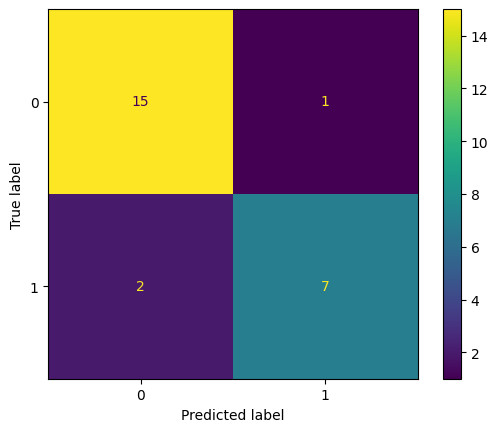

In [10]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [7]:
# Make predictions with the best model
y_pred = best_rf_model.predict(X_test)

# Generate the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.88      0.78      0.82         9

    accuracy                           0.88        25
   macro avg       0.88      0.86      0.87        25
weighted avg       0.88      0.88      0.88        25

Confusion Matrix:
 [[15  1]
 [ 2  7]]


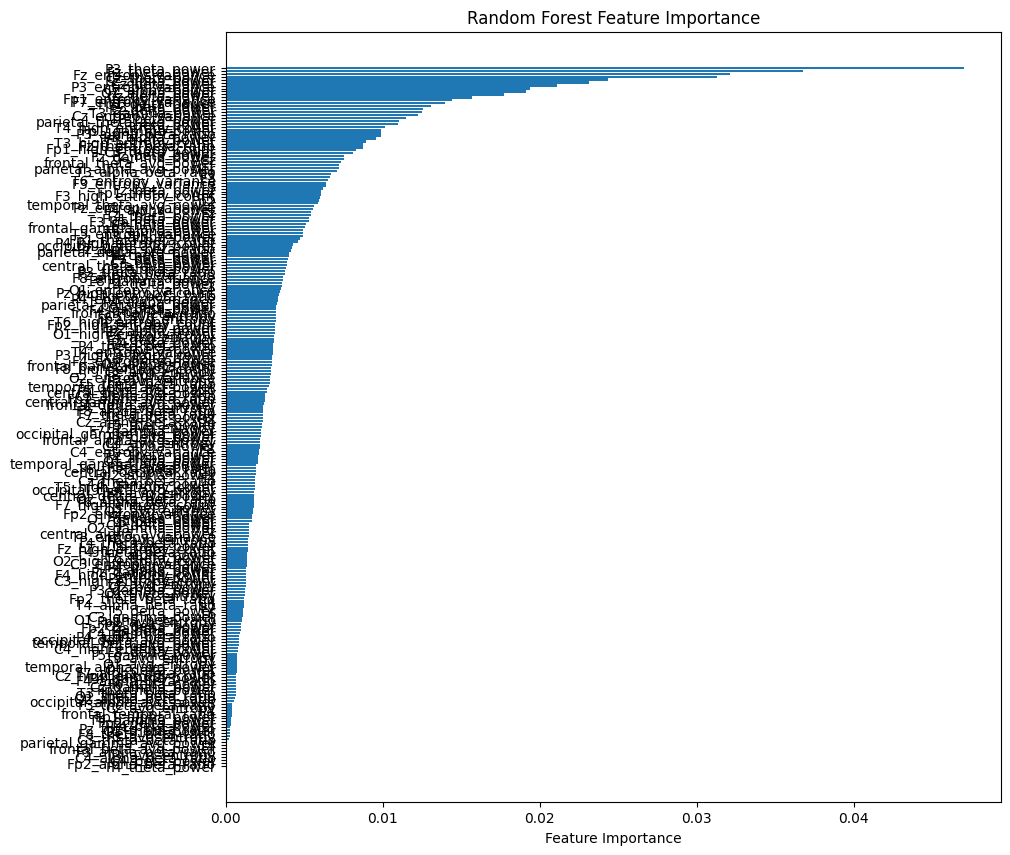

In [11]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importance in descending order
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


PermutationExplainer explainer: 26it [00:11,  2.26s/it]                        



SHAP Summary Plot for Class 0 (Control)


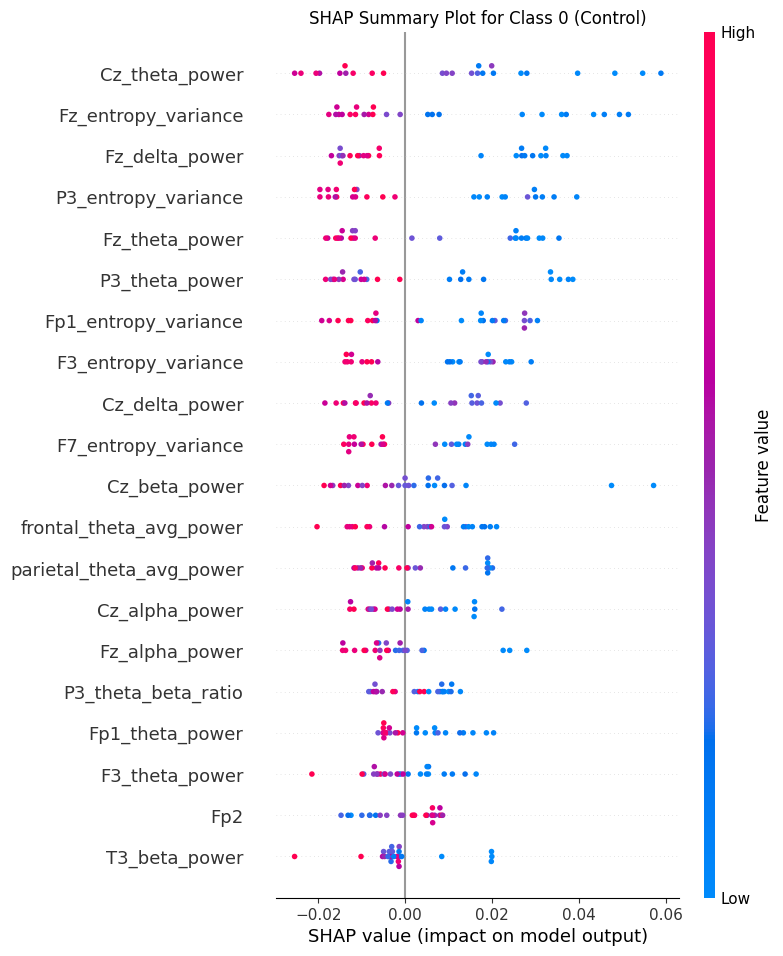


SHAP Summary Plot for Class 1 (ADHD)


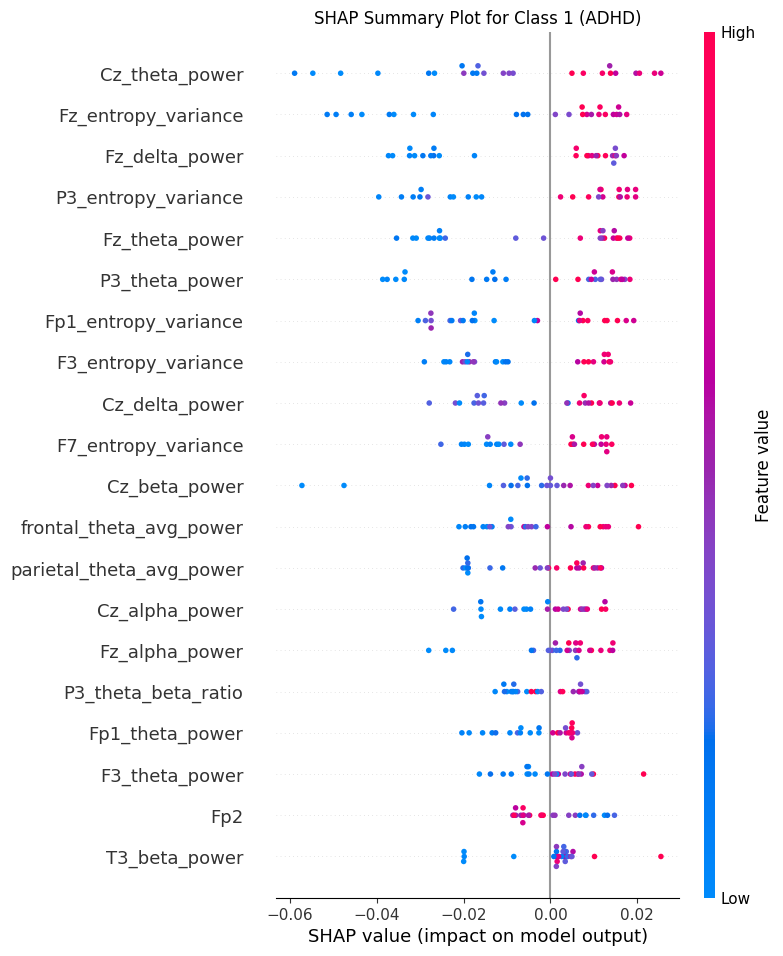

In [31]:
import shap
import matplotlib.pyplot as plt
feature_names = X_train.columns.tolist()  # Get feature names from the training set
target_names = ['Control', 'ADHD']  # Modify these names based on your dataset's labels

# Initialize SHAP explainer for a binary classification model
explainer = shap.Explainer(best_rf_model.predict_proba, X_train)
shap_values = explainer(X_test)

# Loop through both classes (binary classification)
for class_label in range(2):
    print(f"\nSHAP Summary Plot for Class {class_label} ({target_names[class_label]})")

    # Extract SHAP values for the specific class
    class_shap_values = shap_values.values[:, :, class_label]
    
    # Plot SHAP summary for this class
    shap.summary_plot(class_shap_values, X_test,
                      feature_names=feature_names, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_label} ({target_names[class_label]})")
    plt.show()


c:\Users\smrit\miniconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\smrit\miniconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\smrit\miniconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

C:\Users\smrit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\smrit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for Instance: 0
Predicted Class: 0
Probability of Predicted Class: 0.7386666666666666
Local Feature Importance:
Fz_entropy_variance <= 2480.50: -0.044324132554033384
P3_theta_power <= 498.71: -0.04391773608189522
Cz_theta_power <= 64.69: -0.04381478562022066
Cz_beta_power <= 42.84: -0.03754103799750666
Fz_delta_power <= 853.01: -0.03662237789018972
P3_entropy_variance <= 2525.44: -0.03239280395954835
Fz_theta_power <= 537.39: -0.028766434018573494
Fz_alpha_power <= 300.89: -0.027679464345806593
F7_entropy_variance <= 2501.22: -0.025810796585516497
Cz_alpha_power <= 33.77: -0.02121740964503343


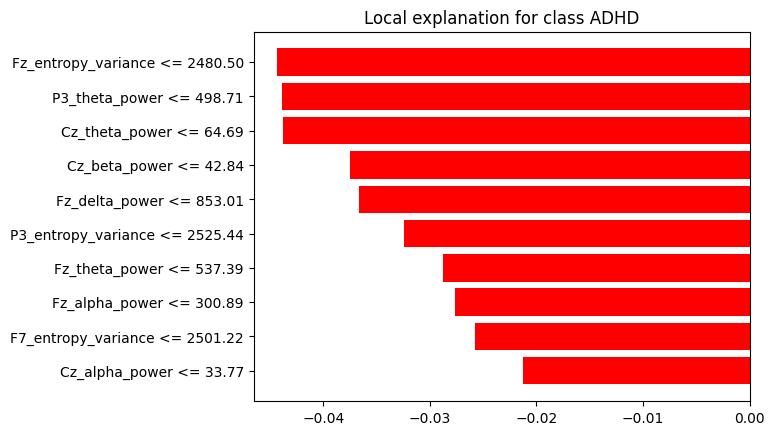

In [33]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Control', 'ADHD'],  # Adjust based on your label names
    mode='classification'
)
instance_index = 0
instance = X_test.iloc[instance_index]

# Choose a test instance to explain
exp = explainer.explain_instance(X_test.iloc[instance_index], best_rf_model.predict_proba, num_features=10)


exp.show_in_notebook(show_table=True)

print("Explanation for Instance:", instance_index)
print("Predicted Class:", best_rf_model.predict([instance])[0])
print("Probability of Predicted Class:", np.max(best_rf_model.predict_proba([instance])))
print("Local Feature Importance:")

for feature_name, weight in exp.as_list():
  print(f"{feature_name}: {weight}")
import matplotlib.pyplot as plt

# Customize the plot's background color
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')  # Change the background color to white

# Show the plot
plt.show()




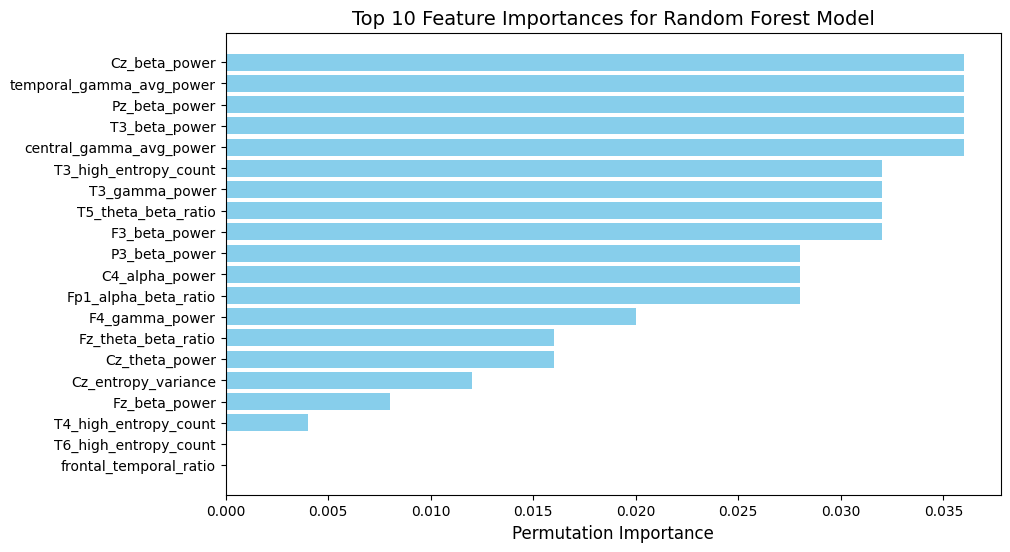

In [41]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()[-20:]  # Select top 10 features

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance", fontsize=12)
plt.title("Top 10 Feature Importances for Random Forest Model", fontsize=14)
plt.yticks(fontsize=10)
plt.show()


After pca

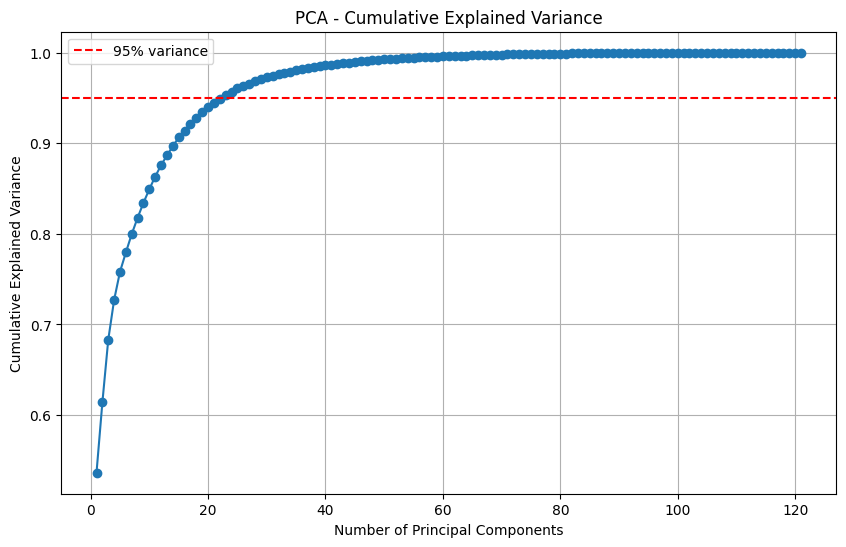

Number of components explaining at least 95% of variance: 46
Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.58      0.78      0.67         9

    accuracy                           0.72        25
   macro avg       0.71      0.73      0.71        25
weighted avg       0.75      0.72      0.73        25


Confusion Matrix:
 [[11  5]
 [ 2  7]]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance to decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()

# Choose the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.99) + 1
print(f"Number of components explaining at least 95% of variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Continue with model training as before
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, combined_data['Label'], test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
